### Importing all the libraries: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
train = pd.read_csv('E:\Data Science Internship\Bharat Intern\Titanic Classification/train.csv')
test = pd.read_csv('E:\Data Science Internship\Bharat Intern\Titanic Classification/test.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
p_id = test.PassengerId

### Visualization of data:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='Survived'>

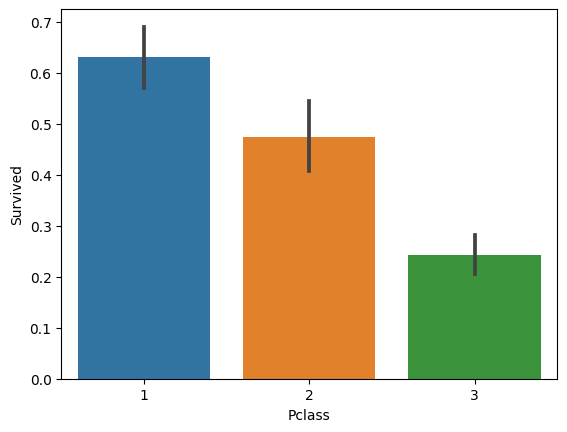

In [6]:
sns.barplot(x='Pclass', y='Survived', data=train)

<Axes: xlabel='Embarked', ylabel='Survived'>

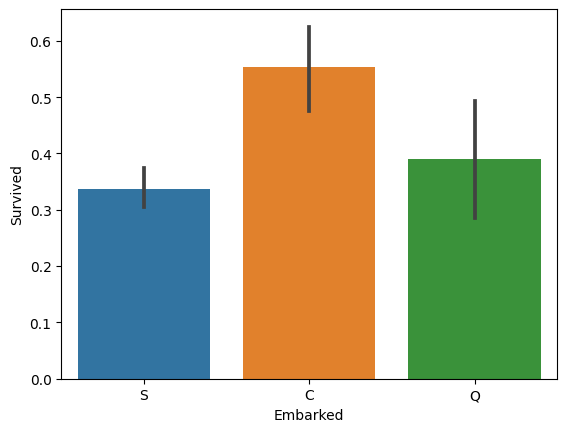

In [7]:
sns.barplot(x='Embarked', y='Survived', data=train)

<Axes: xlabel='Sex', ylabel='Survived'>

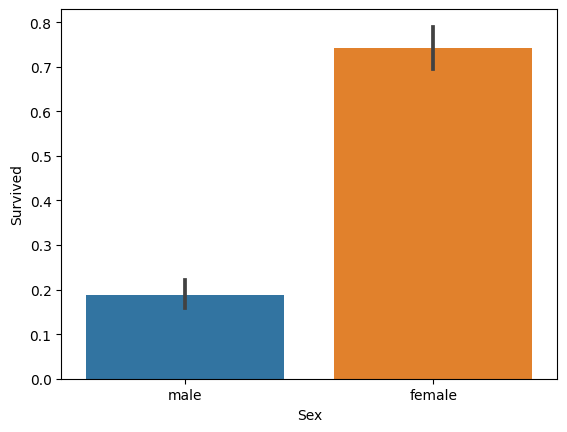

In [8]:
sns.barplot(x='Sex', y='Survived', data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

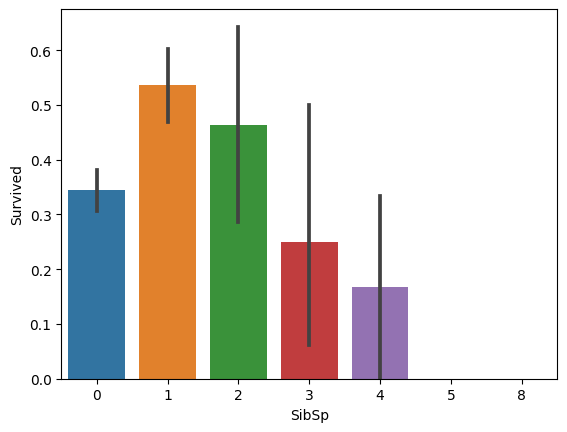

In [9]:
sns.barplot(x='SibSp', y='Survived', data=train)

C:\Users\dasra\AppData\Local\Temp\ipykernel_20400\2998399484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.Age.dropna(), bins=20)


<Axes: xlabel='Age', ylabel='Density'>

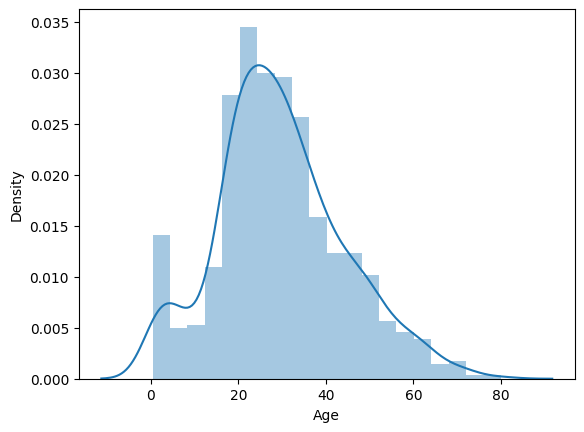

In [10]:
sns.distplot(train.Age.dropna(), bins=20)

In [11]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
train = train.drop([ 'PassengerId','Name', 'Parch', 'Ticket', 'Fare','Cabin' ],axis=1)
test = test.drop([ 'PassengerId','Name', 'Parch', 'Ticket', 'Fare','Cabin'], axis=1)

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,male,22.0,1,S
1,1,1,female,38.0,1,C
2,1,3,female,26.0,0,S
3,1,1,female,35.0,1,S
4,0,3,male,35.0,0,S


In [15]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

### Eliminating NA from dataset

In [16]:
mean_age = train['Age'].mean()

In [17]:
data = [train, test]
for ix in data:
    ix["Embarked"] = ix["Embarked"].fillna('S')
    ix["Age"] = ix["Age"].fillna(mean_age)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Embarked  418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Embarked  891 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 41.9+ KB


### Categorising it:

In [20]:
sex_mapping = {
    'male': 1,
    'female': 0
}

In [21]:
train.Sex = train.Sex.map(sex_mapping)
test.Sex = test.Sex.map(sex_mapping)

In [22]:
embark_mapping = {
    'S': 0,
    'C': 1,
    'Q': 2
}

In [23]:
train.Embarked = train.Embarked.map(embark_mapping)
test.Embarked = test.Embarked.map(embark_mapping)

In [24]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 23), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 23) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 34), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 34) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [25]:
train.Age.describe()

count    891.000000
mean       3.542088
std        1.754984
min        0.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: Age, dtype: float64

### Splitting it:

In [26]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]

In [27]:
X.head()

,Pclass,Sex,Age,SibSp,Embarked
0,3,1,2,1,0
1,1,0,5,1,1
2,3,0,3,0,0
3,1,0,5,1,0
4,3,1,5,0,0


In [28]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=0)

### Time for Classification using Decision tree:

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [31]:
dt.score(X_val, Y_val)

0.7835820895522388

In [32]:
pred = dt.predict(test)

In [33]:
submission = pd.concat([pd.Series(p_id, name='PassengerId'),pd.Series(pred, name='Survived') ],axis=1)
submission.to_csv("titanic_dtc.csv",index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Classification using Random forest:

In [34]:
rf = RandomForestClassifier()

In [35]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
rf.score(X_val, Y_val)

0.7947761194029851

In [37]:
predictions = rf.predict(test)

In [38]:
submission = pd.concat([pd.Series(p_id, name='PassengerId'),pd.Series(predictions, name='Survived') ],axis=1)

In [39]:
submission.to_csv("titanic_rfc.csv",index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
